In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Numerical_train.csv', index_col=0)

In [3]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,3,65.0,8450,0,4,0,0,7,5,...,0,0,0,0,1,0,0,0,1,0
1,20,3,80.0,9600,0,4,0,0,6,8,...,0,0,0,0,1,0,0,0,1,0
2,60,3,68.0,11250,0,3,0,0,7,5,...,0,0,0,0,1,0,0,0,1,0
3,70,3,60.0,9550,0,3,0,0,7,5,...,0,0,0,0,1,0,0,0,0,0
4,60,3,84.0,14260,0,3,0,0,8,5,...,0,0,0,0,1,0,0,0,1,0


In [4]:
target = data.SalePrice

In [5]:
data = data.drop('SalePrice', axis=1)

In [6]:
scaler = StandardScaler()

In [7]:
data_std = scaler.fit_transform(data)

In [8]:
pca = PCA(n_components=2)

In [9]:
data_pca = pca.fit_transform(data_std)

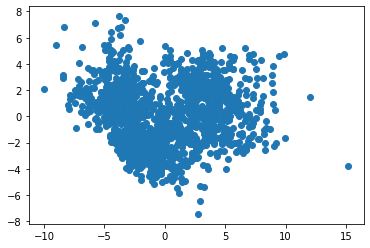

In [10]:
plt.scatter(data_pca[:, 0], data_pca[:, 1])

Now lets color code the points by category and see if we see and interesting pattern

In [11]:
label = [0 if price <= 120000 else 1 if price <= 200000 else 2 for price in target]

Now lets color code the points by category and see if we see and interesting pattern

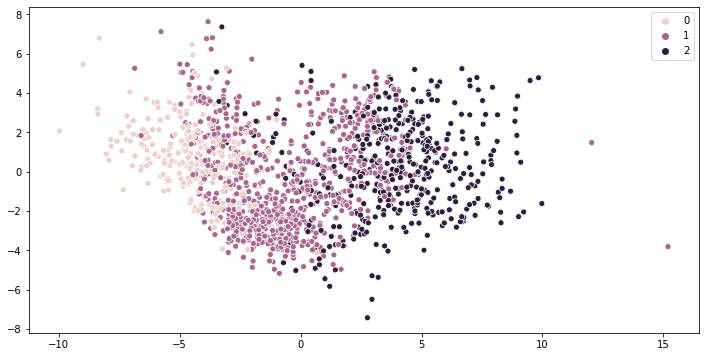

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(data_pca[:, 0], data_pca[:, 1], hue=label)

In [13]:
lda = LinearDiscriminantAnalysis()

In [14]:
data_lda = lda.fit_transform(data_std, label)

/Users/tovaschwartz/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [15]:
lda1 = data_lda[:, 0]

In [16]:
lda2 = data_lda[:, 1]

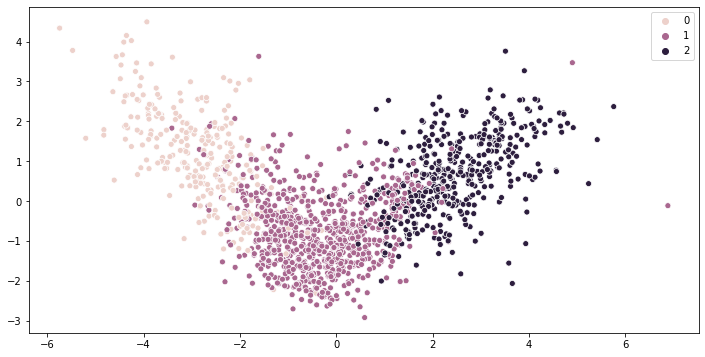

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(lda1, lda2, hue=label)

In [18]:
pca = PCA()

In [19]:
pca.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
variance = pca.explained_variance_

In [21]:
total_va = variance.sum()

In [22]:
cum_var = np.cumsum(variance)/total_va

<BarContainer object of 156 artists>

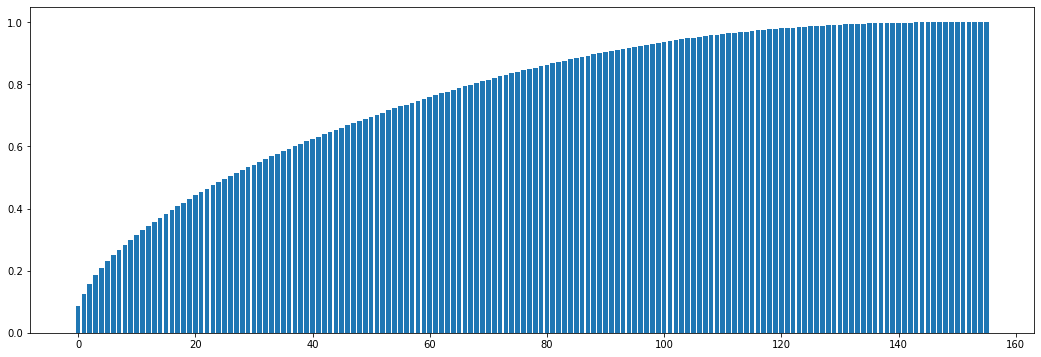

In [23]:
plt.figure(figsize=(18,6))
plt.bar(range(len(cum_var)), cum_var)